In [1]:
from ifapp.love_dframe import ifapp_df
from ifapp.analize_data import ifapp_Mlearn, ifapp_raster
from ifapp.love_dframe import pkl_model_load, pkl_model_save, pd, np

In [2]:
path_DF = r'F:\My Drive\Shared TIF File\Forests2020\Data OCI\00Research\File Excel'
path_save = r'F:\My Drive\Shared TIF File\Forests2020\Data OCI\00Research\File Excel'
path_Mdl = r'C:\Users\Felix\ix_onepy\Data\Data Model'

In [3]:
"""Load Data Frame"""
loadDF = pd.read_excel(path_DF + '/CC_DATA_L0607.xlsx')
loadDF.head(4)

,frci5m,Band_2,Band_3,Band_4,Band_5,B_NDVI
0,0.0,0.120041,0.103955,0.097053,0.143030,0.191504
1,0.0,0.123644,0.110273,0.109867,0.148028,0.147971
2,0.0,0.124761,0.113850,0.115550,0.161831,0.166850
3,0.0,0.123704,0.108781,0.104998,0.130728,0.109152


In [4]:
select_col = ['Band_2', 'Band_3', 'Band_4', 'Band_5']
select_row = 'frci5m'
dfx = pd.DataFrame(loadDF, columns=select_col)
dfy = np.asarray(loadDF[select_row])

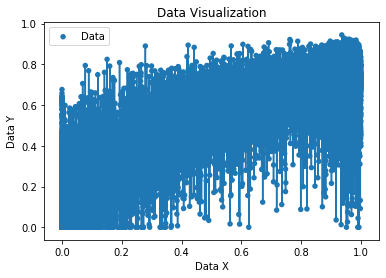

RMSE: 0.20475569885881073 ... R2: 0.7523593523942181


In [5]:
load_Mdl = pkl_model_load(path_Mdl + '/L6n7_SVRnoNDVI_rbf.pkl')

"""Ajusted data from zero to one"""
dfy_pred = load_Mdl.predict(dfx)
dfy_pred[dfy_pred < 0] = 0.00
dfy_pred[dfy_pred > 1] = 1.00
Model_RMSE = ifapp_Mlearn.Model_RMSE(dfy, dfy_pred)
Model_R2 = ifapp_Mlearn.Model_R2(dfy, dfy_pred)
ifapp_Mlearn.plot_data(dfy_pred, dfy)
print("RMSE:", Model_RMSE, "...", "R2:", Model_R2)

In [6]:
make_new_dframe = ifapp_df.combine_dframe(dfy, dfy_pred)
make_new_dframe.to_excel(path_save + "/CC_L6n7_noNDVI.xlsx")